# Classification Task dengan Support Vector Machine (SVM)

Referensi: [https://www.svm-tutorial.com/](https://www.svm-tutorial.com/)

## Konsep Dasar

### Decision Boundary (Hyperplane)

<!-- ![](./images/svm_linear.png) -->
<div>
<img src="./images/svm_linear.png" width="400">
</div>

### Maximum Margin

<!-- ![](./images/svm_margin.png) -->
<div>
<img src="./images/svm_margin.png" width="400">
</div>

### Linearly Inseperable <br/>& Kernel Tricks
Referensi: [https://www.quora.com/What-is-the-kernel-trick](https://www.quora.com/What-is-the-kernel-trick)
<div>
<img src="./images/svm_kernel_01.png" width="800">
</div>

<p/>



## Dataset: The MNIST database of handwritten digits

Referensi: [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/)

In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', data_home='./dataset/mnist', return_X_y=True)
X.shape

(70000, 784)

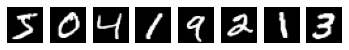

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

pos = 1
for data in X[:8]:
    plt.subplot(1, 8, pos)
    plt.imshow(data.reshape((28, 28)), 
               cmap=cm.Greys_r)
    plt.axis('off')
    pos += 1

plt.show()

In [3]:
y[:8]

array(['5', '0', '4', '1', '9', '2', '1', '3'], dtype=object)

In [4]:
# X_train = X[:60000]
# y_train = y[:60000]
# X_test = X[60000:]
# y_test = y[60000:]

X_train = X[:1000]
y_train = y[:1000]
X_test = X[69000:]
y_test = y[69000:]

## Classification dengan SVC (Support Vector Classifier)

In [5]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(X_train, y_train)

SVC(random_state=0)

In [6]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       102
           1       0.97      0.99      0.98       119
           2       0.85      0.82      0.84        99
           3       0.97      0.87      0.92       102
           4       0.88      0.95      0.91        92
           5       0.91      0.86      0.88        85
           6       0.93      0.95      0.94       102
           7       0.92      0.94      0.93       115
           8       0.89      0.94      0.91        94
           9       0.92      0.84      0.88        90

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000



## Hyperparameter Tuning dengan `GridSearchCV`
Referensi: [https://en.wikipedia.org/wiki/Hyperparameter_optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization)

In [7]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=SVC(random_state=0),
                           param_grid=parameters,
                           n_jobs=6,
                           verbose=1,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    6.6s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   44.6s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:  1.1min finished


GridSearchCV(estimator=SVC(random_state=0), n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [8]:
print(f'Best Scoere: {grid_search.best_score_}')

best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameters:')
for param in parameters:
    print(f'\t{param}: {best_params[param]}')

Best Scoere: 0.907
Best Parameters:
	kernel: rbf
	C: 10
	gamma: scale


## Predict & Evaluate

In [9]:
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       102
           1       0.98      0.99      0.98       119
           2       0.87      0.85      0.86        99
           3       0.99      0.89      0.94       102
           4       0.91      0.95      0.93        92
           5       0.92      0.89      0.90        85
           6       0.93      0.94      0.94       102
           7       0.93      0.93      0.93       115
           8       0.89      0.95      0.92        94
           9       0.92      0.88      0.90        90

    accuracy                           0.93      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.93      0.93      0.93      1000

